### Exercise 4.10.1 Task 

In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### 01. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [13]:
project_path = r'C:\Users\cneva\06-2024 Instacart Basket Analysis'

In [14]:
df = pd.read_pickle(os.path.join(project_path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

In [15]:
pd.options.display.max_columns = None

In [16]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_day_2,busiest_period_of_day,max_order,loyalty_flag,user_average_price,user_spender_type,user_median_days_since,user_order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


#### 02.  Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

##### First and last name columns were dropped in the pervious exercise

#### 03.  The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. 

##### create region lists

In [21]:
region_northeast = [
    'Maine',
    'New Hampshire',
    'Vermont',
    'Massachusetts',
    'Rhode Island',
    'Connecticut',
    'New York',
    'Pennsylvania',
    'New Jersey'
]

In [22]:
region_midwest = [
    'Wisconsin',
    'Michigan',
    'Illinois',
    'Indiana',
    'Ohio',
    'North Dakota',
    'South Dakota',
    'Nebraska',
    'Kansas',
    'Minnesota',
    'Iowa',
    'Missouri'
]

In [23]:
region_south = [
    'Delaware',
    'Maryland',
    'District of Columbia',
    'Virginia',
    'West Virginia',
    'North Carolina',
    'South Carolina',
    'Georgia',
    'Florida',
    'Kentucky',
    'Tennessee',
    'Mississippi',
    'Alabama',
    'Oklahoma',
    'Texas',
    'Arkansas',
    'Louisiana'
]

In [24]:
region_west = [
    'Idaho',
    'Montana',
    'Wyoming',
    'Nevada',
    'Utah',
    'Colorado',
    'Arizona',
    'New Mexico',
    'Alaska',
    'Washington',
    'Oregon',
    'California',
    'Hawaii'
]

##### create region column

In [26]:
df.loc[df['state'].isin(region_northeast), 'region'] = 'Northeast'

In [27]:
df.loc[df['state'].isin(region_midwest), 'region'] = 'Midwest'

In [28]:
df.loc[df['state'].isin(region_south), 'region'] = 'South'

In [29]:
df.loc[df['state'].isin(region_west), 'region'] = 'West'

In [30]:
df['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

##### spending habits by region

In [32]:
region_ct = pd.crosstab(df['region'], df['user_spender_type'], dropna = False)
ct['High spender % of total'] = ct['High spender'] / (ct['High spender'] + ct['Low spender'])

In [33]:
ct

user_spender_type,High spender,Low spender,High spender % of total
region,,,
Midwest,155975,7441350,0.020530
Northeast,108225,5614511,0.018911
South,209691,10582194,0.019430
West,160354,8132559,0.019336


###### number of high spenders per region are fairly consistent

#### 04 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [36]:
# if max order < 5, remove, else keep
df.loc[df['max_order'] < 5, 'activity_flag'] = 'remove'

In [37]:
df['activity_flag'].value_counts(dropna = False)

activity_flag
NaN       30964564
remove     1440295
Name: count, dtype: int64

In [38]:
# remove rows that do not have 'remove' in activity flag
df_2 = df[df['activity_flag'] != 'remove']

In [39]:
len(df_2)

30964564

In [40]:
df_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_day_2,busiest_period_of_day,max_order,loyalty_flag,user_average_price,user_spender_type,user_median_days_since,user_order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN


In [41]:
df_2.drop(columns = ['activity_flag'], inplace = True)

C:\Users\cneva\AppData\Local\Temp\ipykernel_8780\2317871647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop(columns = ['activity_flag'], inplace = True)


In [42]:
df_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_day_2,busiest_period_of_day,max_order,loyalty_flag,user_average_price,user_spender_type,user_median_days_since,user_order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [43]:
# df_2.to_pickle(os.path.join(project_path, '02 Data', 'Prepared Data', 'ords_prods_cust_2.pkl'))

### A.) Age Groups

#### 05 Create Profile

In [61]:
# create column age_group based on following categories:
# young adult: age < 26
# adult: 26 <= age < 65
# senior: age >= 65

In [65]:
df_2.loc[df['age'] < 26, 'age_group'] = 'Young Adult'

In [67]:
df_2.loc[ (df['age'] >= 26) & (df['age'] < 65), 'age_group'] = 'Adult'

In [69]:
df_2.loc[df['age'] >= 65, 'age_group'] = 'Senior'

In [215]:
# number of unique user_ids per age_group
age_group_user_count = df_2.groupby('age_group')['user_id'].nunique().sort_values(ascending = True)

#### 06 Visualization of Distribution

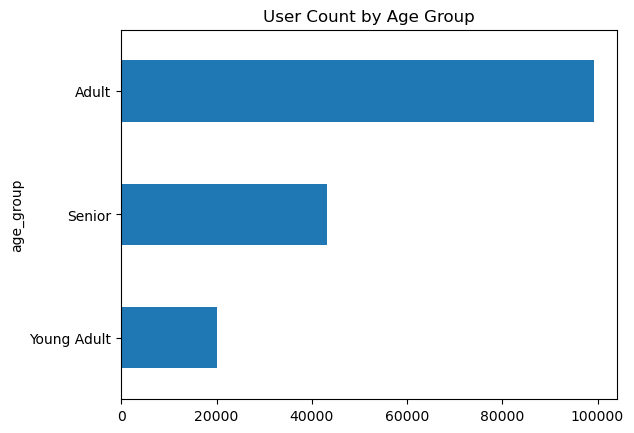

In [233]:
# plot visualization
age_group_user_count_bar = age_group_user_count.plot(
    kind = 'barh',
    title = 'User Count by Age Group'
)

In [229]:
# save visualization
age_group_user_count_bar.figure.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'age_group_user_count.png'))

#### 07 Aggregate max, mean, min for usage frequency and expenditure

In [ ]:
df.groupby('age_group').agg({median

### B.) Income Groups

#### 05 Create Profile

In [104]:
# create column income_group based on following categories:
# low: income < 50,000
# middle: 50,000 <= income < 100,000
# high: income >= 100,000

In [76]:
df_2.loc[df['income'] < 40000, 'income_group'] = 'Low'

C:\Users\cneva\AppData\Local\Temp\ipykernel_8780\2447248641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df['income'] < 40000, 'income_group'] = 'Low'


In [77]:
df_2.loc[ (df['income'] >= 40000) & (df['income'] < 100000), 'income_group'] = 'Middle'

In [78]:
df_2.loc[df['income'] >= 100000, 'income_group'] = 'High'

In [82]:
df_2['income_group'].value_counts()

income_group
Middle    15145137
High      14207402
Low        1612025
Name: count, dtype: int64

#### 06 Visualization of Distribution

#### 07 Aggregate max, mean, min for usage frequency and expenditure

### C.) Dependancy Groups

In [108]:
# create column dependent_group based on following categories:
# no dependents: n_dependents = 0
# has dependents: n_dependents > 0
df_2.loc[df['n_dependants'] == 0, 'dependant_group'] = 'No dependants'

C:\Users\cneva\AppData\Local\Temp\ipykernel_8780\2885153547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df['n_dependants'] == 0, 'dependant_group'] = 'No dependants'


In [110]:
df_2.loc[df['n_dependants'] >= 0, 'dependant_group'] = 'Has dependants'

#### 06 Visualization of Distribution

#### 07 Aggregate max, mean, min for usage frequency and expenditure

### day of week groups

##### hour of day groups 

##### single adult 

In [113]:
df_2['fam_status'].value_counts()

fam_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [120]:
# create subset on users that ordered from pet
# filter user_ids to users who have ordered from pet department
df_single_adult_users = df_2[( df_2['fam_status'] == 'single') & (df_2['age_group'] == 'Adult')]['user_id'].unique()

In [122]:
df_single_adult = df_2[df_2['user_id'].isin(df_single_adult_users)]

#### 07 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### Department Groups (Pet Owners)

#### 05 create profile

In [92]:
# read department file
df_dep = pd.read_csv(os.path.join(project_path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [94]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [123]:
# create subset on users that ordered from pet
# filter user_ids to users who have ordered from pet department
df_pet_users = df_2[df_2['department_id'] == 8]['user_id'].unique()

In [126]:
df_pet = df_2[df_2['user_id'].isin(df_pet_users)]

In [235]:
df_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_day_2,busiest_period_of_day,max_order,loyalty_flag,user_average_price,user_spender_type,user_median_days_since,user_order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,age_group,income_group,dependant_group
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult,Middle,Has dependants
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult,Middle,Has dependants
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult,Middle,Has dependants
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult,Middle,Has dependants
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Adult,Middle,Has dependants


In [ ]:
df_customer_subset = df_2.groupby(['user_id', 'region', 'age_group', 'income_group', 'dependant_group',